In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.interpolate import spline
from tqdm import tqdm

In [2]:
def smooth(values, w_range):
    new_values = []

    for val in tqdm(range(len(values))):
        
        w_start = val - w_range
        w_end = val + w_range
        w_start = max(w_start, 0)
        w_end = min(w_end, (len(values) - 1))
        loc_vals = values[w_start : w_end]
        local_value = sum(loc_vals)/len(loc_vals)
        new_values.append(local_value)
    return new_values

In [3]:
rewards_data = pd.read_csv("rewards.csv")
self_c = pd.read_csv("self_coins.csv")
othr_c = pd.read_csv("other_coins.csv")
neth_c = pd.read_csv("neither_coins.csv")

In [4]:
len(rewards_data), len(self_c)

(1312, 1312)

In [5]:
len(neth_c['episode']), len(othr_c['episode']), len(self_c['episode'])

(1312, 1312, 1312)

In [17]:
episodes = rewards_data['episode']
episodes_n = neth_c['episode']
episodes_o = othr_c['episode']
episodes_s = self_c['episode']

In [14]:
raw_reward = rewards_data['1000 wo map - reward']
raw_self_c = self_c['1000 wo map - self_coins1']
raw_othr_c = othr_c['1000 wo map - other_coins1']
raw_neth_c = neth_c['1000 wo map - neither_coins1']

In [25]:
len(smoothed_reward), len(episodes)

(1312, 1312)

In [15]:
smoothed_reward = smooth(raw_reward, 100)
episodes = rewards_data['episode']
smooth_amount = 100

smoothed_neth = smooth(raw_self_c, smooth_amount)
smoothed_othr = smooth(raw_othr_c, smooth_amount)
smoothed_self = smooth(raw_neth_c, smooth_amount)

100%|██████████| 1312/1312 [00:00<00:00, 15839.00it/s]


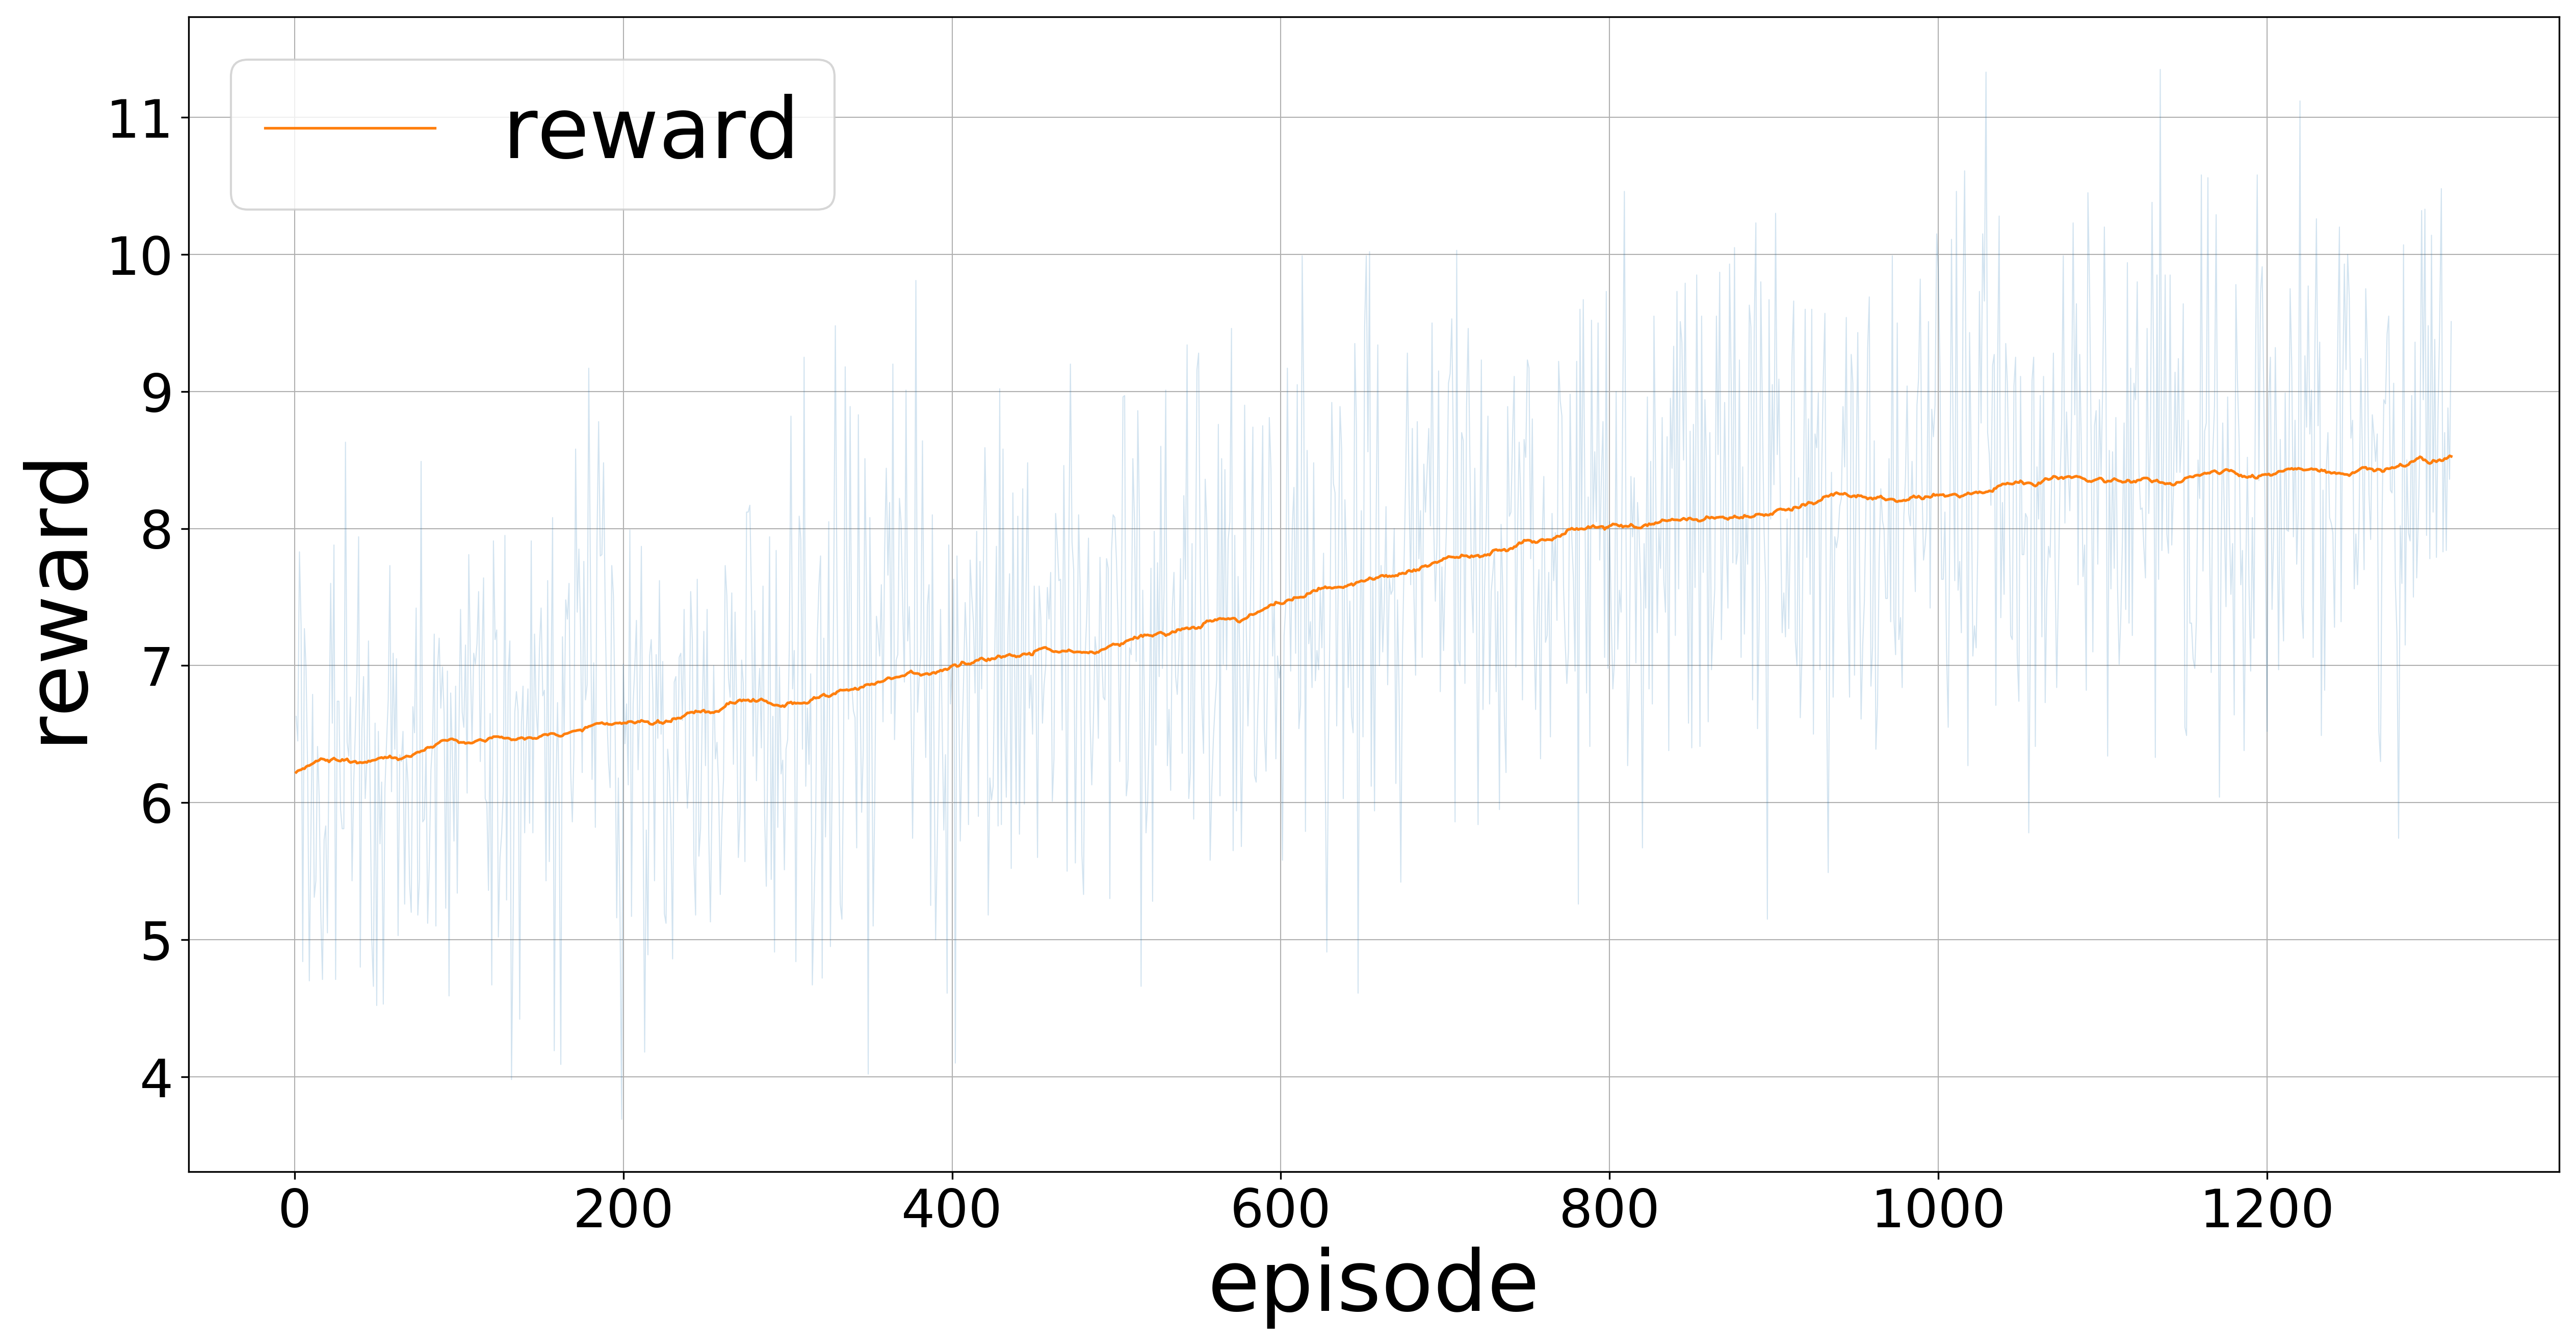

In [31]:
plt.figure(figsize=(20, 10), dpi = 300)
plt.plot(episodes, list(raw_reward), alpha=0.2, linewidth=0.5)
plt.plot(episodes, smoothed_reward, label='reward', linewidth=1.25)
plt.xlabel('episode', fontsize=40)
plt.ylabel('reward', fontsize=40)
plt.xticks(fontsize=25, rotation=0)
plt.yticks(fontsize=25, rotation=0)
plt.grid(linewidth='0.5')
plt.legend(fontsize=40)
plt.show()

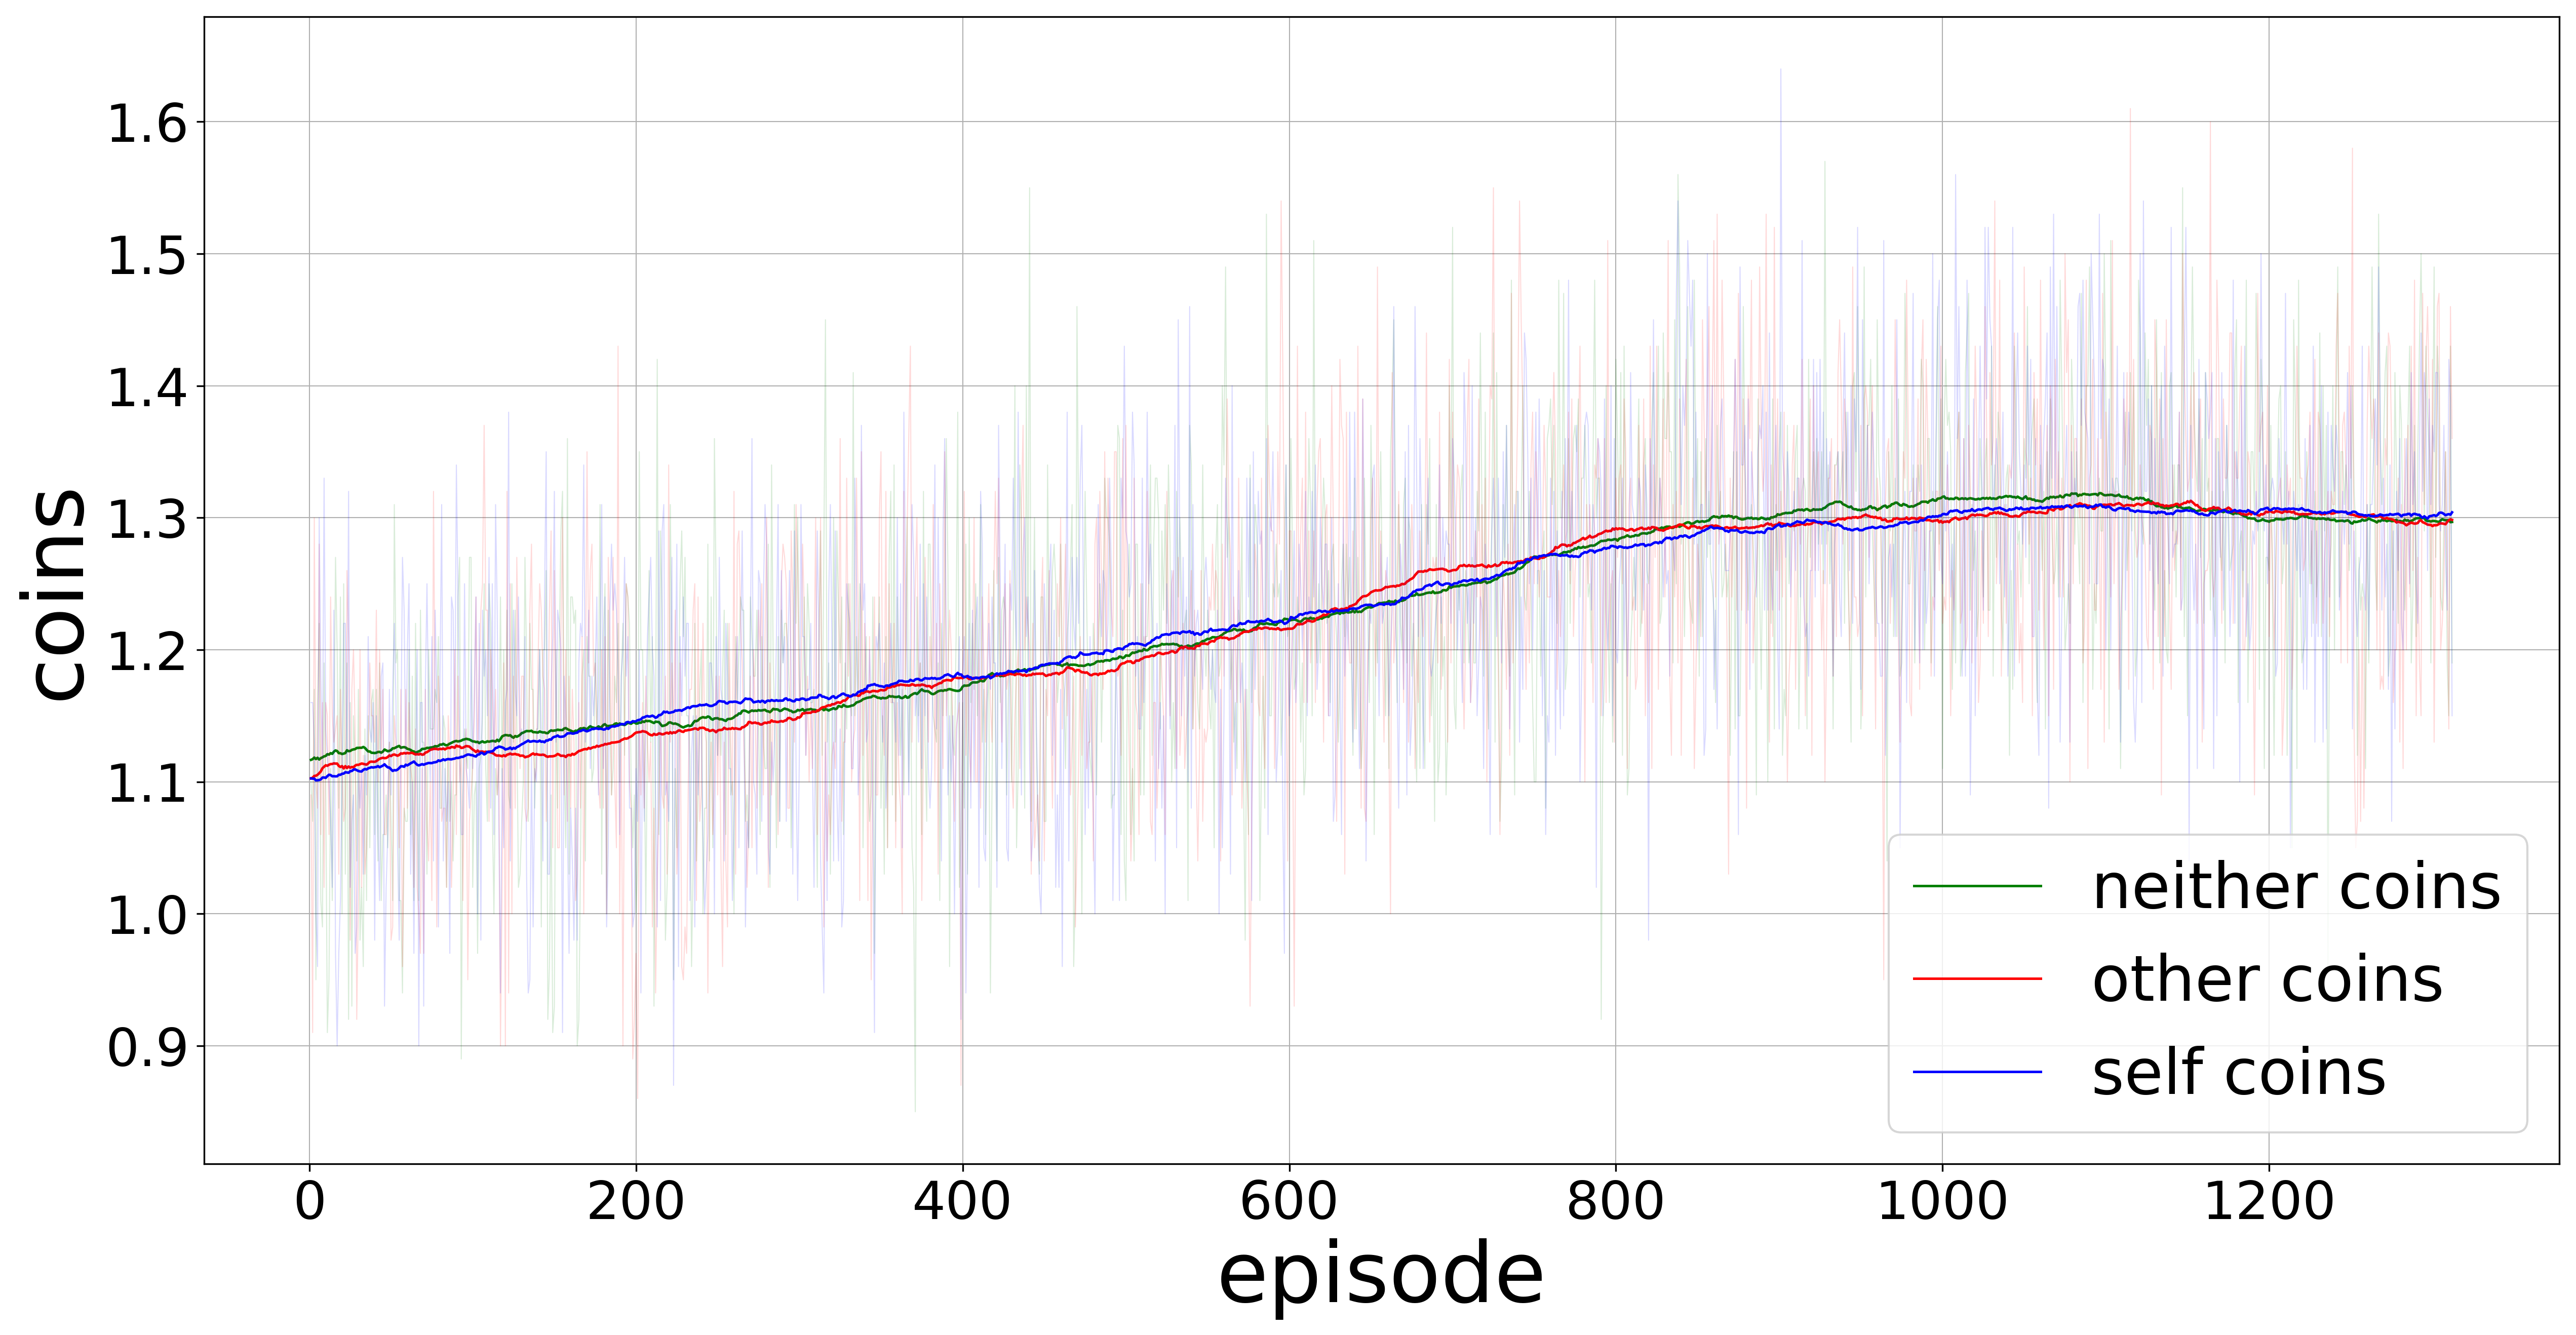

In [32]:
plt.figure(figsize=(20, 10), dpi = 300)
plt.plot(episodes_n, list(raw_neth_c), alpha=0.15, c='g', linewidth=0.5)
plt.plot(episodes_n, smoothed_neth, label='neither coins', c='g', linewidth=1.2)

plt.plot(episodes_o, list(raw_othr_c), alpha=0.15, c='r', linewidth=0.5)
plt.plot(episodes_o, smoothed_othr, label='other coins', c='r', linewidth=1.2)

plt.plot(episodes_s, list(raw_self_c), alpha=0.15, c='b', linewidth=0.5)
plt.plot(episodes_s, smoothed_self, label='self coins', c='b', linewidth=1.2)
plt.xlabel('episode', fontsize=40)
plt.ylabel('coins', fontsize=40)
plt.xticks(fontsize=25, rotation=0)
plt.yticks(fontsize=25, rotation=0)
plt.grid(linewidth='0.5')
plt.legend(fontsize=30, loc = 4)
plt.show()